In [13]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import data_module_covid as dmc
import matplotlib as mpl
from scipy.optimize import curve_fit
import datetime as dt

Read the data from  Helsingin Sanomat (https://github.com/HS-Datadesk/koronavirus-avoindata)

In [14]:

# data = requests.get("https://w3qa5ydb4l.execute-api.eu-west-1.amazonaws.com/prod/finnishCoronaData")
# data_json = data.json()
data_json = dmc.get_data_from_HS()
#Take only the data for confirmed cases:
df = pd.DataFrame.from_dict(data_json["confirmed"])

print(df.dtypes)
df.head(5)



id                        object
date                      object
healthCareDistrict        object
infectionSourceCountry    object
infectionSource           object
dtype: object


,id,date,healthCareDistrict,infectionSourceCountry,infectionSource
0,1,2020-01-29T11:00:00.000Z,Lappi,CHN,unknown
1,2,2020-02-26T11:00:00.000Z,HUS,ITA,unknown
2,3,2020-03-01T11:00:00.000Z,HUS,FIN,2
3,4,2020-02-28T11:00:00.000Z,HUS,ITA,unknown
4,5,2020-03-01T11:00:00.000Z,HUS,FIN,4


Now, make a function that extracts the confirmed cases of COVID-19 with their timestamps.

Then we group them to get the daily confirmed cases.

There are 223 (at the time) confirmed cases with all having their own timestamps.
Get the cumulative sum of the confirmed cases and visualise the daily counts and cumulative sum.

new_dates  count  days_from_beginning  cum_sum
0  2020-01-29      1                    0        1
1  2020-02-26      1                   28        2
2  2020-02-28      1                   30        3
3  2020-03-01      3                   32        6
4  2020-03-02      1                   33        7
5  2020-03-05      5                   36       12
6  2020-03-06      3                   37       15
7  2020-03-07      4                   38       19
8  2020-03-08      5                   39       24
9  2020-03-09      9                   40       33
10 2020-03-10      7                   41       40
11 2020-03-11     25                   42       65
12 2020-03-12     46                   43      111
13 2020-03-13     46                   44      157
14 2020-03-14     70                   45      227
15 2020-03-15     16                   46      243
16 2020-03-16     32                   47      275
17 2020-03-17     40                   48      315
18 2020-03-18     42               

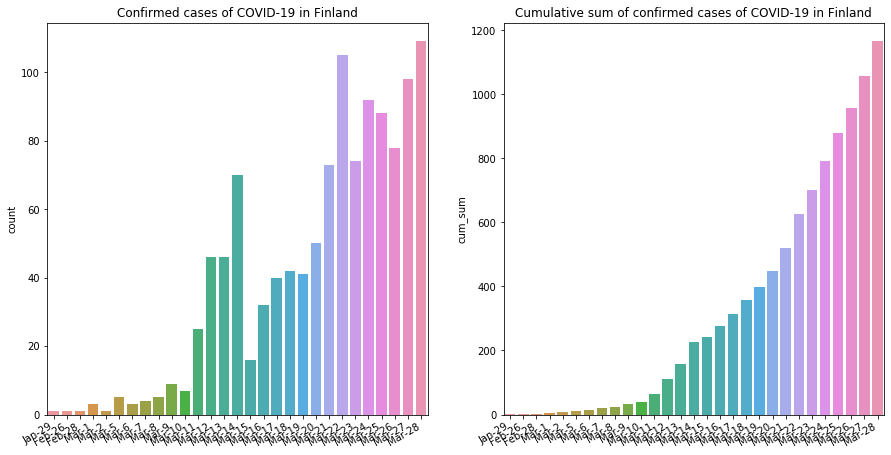

In [15]:
covid = dmc.extract_counts(df)

#covid['cum_sum'] = covid['count'].cumsum()
print(covid)
#print(covid.dtypes)

date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in covid['new_dates']]
#print(date_mapping)
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=date_mapping, y='count', data=covid,ax=axes[0])
sns.barplot(x=date_mapping, y='cum_sum', data=covid,ax=axes[1])
axes[0].title.set_text('Confirmed cases of COVID-19 in Finland')
axes[1].title.set_text('Cumulative sum of confirmed cases of COVID-19 in Finland')
fig.autofmt_xdate()



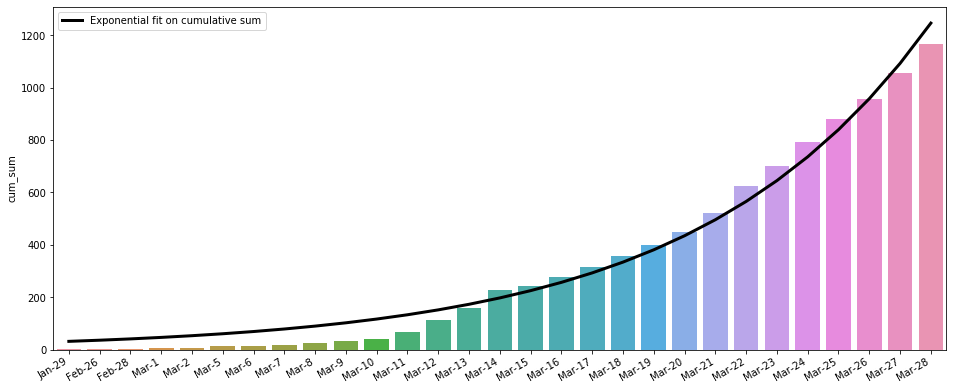

In [16]:
def exp_func(x, a, b, c):
    c = 0
    return a * np.exp(b * x) + c

date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in covid['new_dates']]
xdata = range(0,len(covid))
popt, pcov = curve_fit(exp_func, xdata, covid['cum_sum'])

fig,ax = plt.subplots(figsize=(16,7))
ax.plot(xdata, exp_func(xdata, *popt), 'k-',linewidth=3,label="Exponential fit on cumulative sum")
sns.barplot(x=date_mapping, y='cum_sum', data=covid,ax=ax)
fig.autofmt_xdate()
plt.legend()

Finland stopped testing people on a large scale, thus the data is inconclusive from now on (about 20.3.2020)

Read global data. (https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)

In [17]:

df_global = dmc.get_data_global()
df_global.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
Albania,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
Algeria,0,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
Andorra,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


Visualise the data for some countries/regions

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
3/23/20    81498
3/24/20    81591
3/25/20    81661
3/26/20    81782
3/27/20    81897
Name: China, Length: 66, dtype: int64


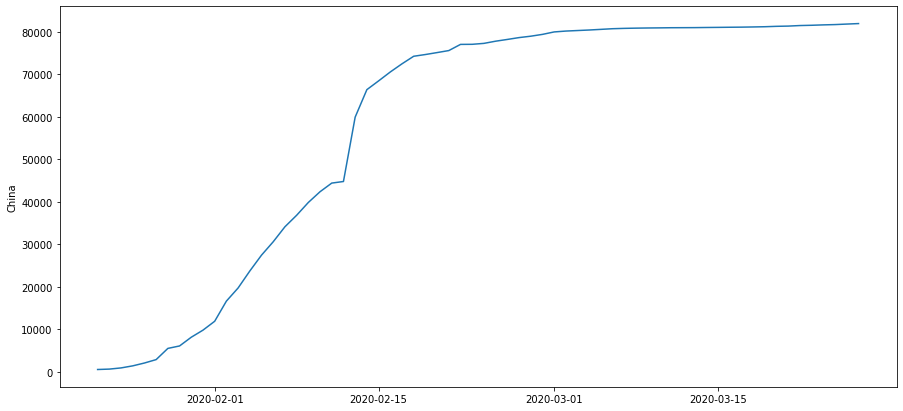

In [18]:
fig,ax = plt.subplots(figsize=(15,7))
sns.lineplot(pd.to_datetime(df_global.columns),df_global.loc["China"],ax=ax)
print(df_global.loc["China"])
china_cases_total_current = df_global.loc["China"].values[-1]

It seems like the growth of the Chinese cases has stopped suddenly, which indicates lack of transparency. From this one could interpret that the number of cases in China is false,and the government is not publishing all the cases. Thus, drop China from the data.

Visualise the total confirmed cases (cumulative sum of all countries.)

In [19]:
df_global_inc_china = df_global
df_global = df_global.drop("China",axis=0)
df_global["group"] = pd.Series(np.ones(len(df_global)),index=df_global.index)
df_global_totals = df_global.groupby("group").sum()
global_total_timeseries = pd.Series(df_global_totals.values[0],index=pd.to_datetime(list(df_global_totals.columns)))
global_total_timeseries = global_total_timeseries.loc["2020-02-23":] #Exclude first cases from China

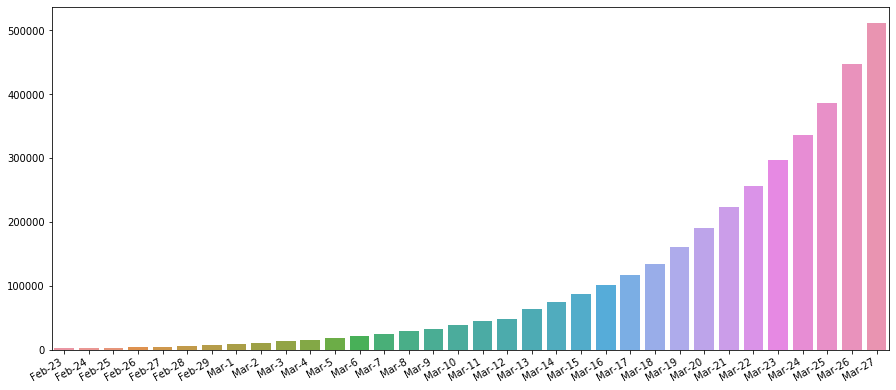

In [20]:
date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in global_total_timeseries.index]

fig2, ax2 = plt.subplots(figsize=(15,7))
sns.barplot(x=date_mapping,y=global_total_timeseries.values,ax=ax2)
fig2.autofmt_xdate()


Exponential model would probably give some idea of the growth.

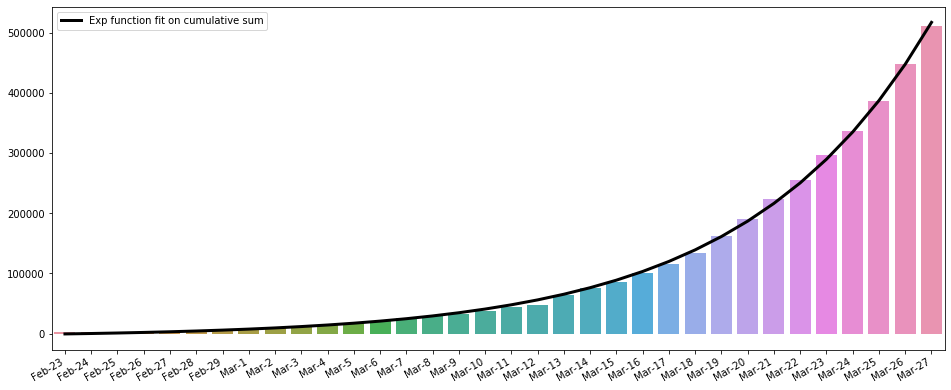

In [21]:

def exp_func2(x, a, b, c):
    #c = 0
    return a * np.exp(b * x) + c

date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in global_total_timeseries.index]
xdata = np.arange(0,len(global_total_timeseries))
popt, pcov = curve_fit(exp_func2, xdata, global_total_timeseries.values)
fig3,ax3 = plt.subplots(figsize=(16,7))
ax3.plot(xdata, exp_func2(xdata, *popt), 'k-',linewidth=3,label="Exp function fit on cumulative sum")
sns.barplot(x=date_mapping,y=global_total_timeseries.values,ax=ax3)
fig3.autofmt_xdate()
plt.legend()




The Exponential function fit looks nice and probably has low error, but this could easily be a classical case of overfitting. Also, the exponential fit assumes infinite growth, which will be proven wrong (hopefully).

Predict next day using the aforementioned Exponential function.

In [22]:
predict = exp_func2(len(xdata)+1,*popt) + china_cases_total_current
print(f"Prediction of confirmed cases for the next day ({dt.date.today()}): {predict}")

Prediction of confirmed cases for the next day (2020-03-28): 771969.9143320981


For fun, plot the total cases including China.

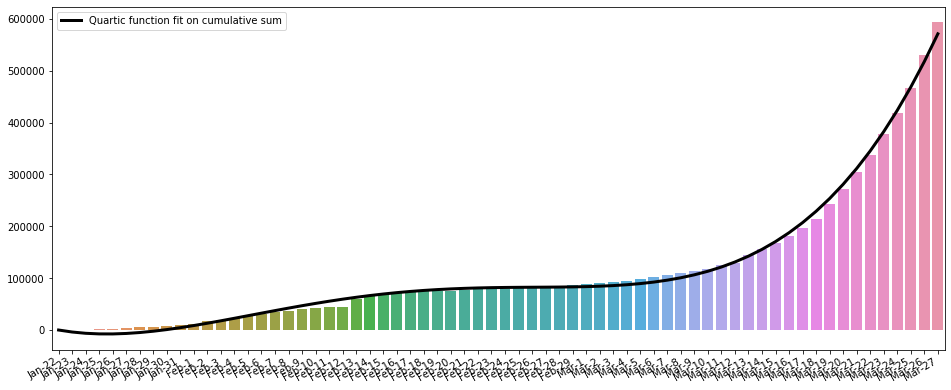

In [23]:
def quartic(x, a,b,c,d,e):
    e = 0
    # return a*x**3+b*x**2+c*x+d
    return a*x**4+b*x**3+c*x**2+d*x+e

df_global_inc_china["group"] = pd.Series(np.ones(len(df_global_inc_china)),index=df_global_inc_china.index)
df_global_totals = df_global_inc_china.groupby("group").sum()

global_total_timeseries = pd.Series(df_global_totals.values[0],index=pd.to_datetime(list(df_global_totals.columns)))
date_mapping = ["{}-{}".format(x.strftime("%b"),x.day) for x in global_total_timeseries.index]
xdata = np.arange(0,len(global_total_timeseries))
popt, pcov = curve_fit(quartic, xdata, global_total_timeseries.values)
fig3,ax3 = plt.subplots(figsize=(16,7))
ax3.plot(xdata, quartic(xdata, *popt), 'k-',linewidth=3,label="Quartic function fit on cumulative sum")
sns.barplot(x=date_mapping,y=global_total_timeseries.values,ax=ax3)
fig3.autofmt_xdate()
plt.legend()